<a href="https://colab.research.google.com/github/matildecanete/Proyecto-Elegibilidad-tarjeta-de-credito/blob/main/Elegibilidad_tarjeta_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay

In [3]:
df = pd.read_csv('/content/tarjetadecredito.csv.zip')
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
df.drop(columns= 'ID', inplace=True)

In [5]:
df.shape

(9709, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

>No hay valores nulos.

In [7]:
df.duplicated().sum()

0

>No hay valores duplicados.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,9709.0,0.348749,0.476599,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Own_car,9709.0,0.367700,0.482204,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Own_property,9709.0,0.671542,0.469677,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Work_phone,9709.0,0.217427,0.412517,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Phone,9709.0,0.287671,0.452700,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Email,9709.0,0.087548,0.282650,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Unemployed,9709.0,0.174683,0.379716,0.000000,0.000000,0.000000,0.000000,1.000000e+00
Num_children,9709.0,0.422804,0.767019,0.000000,0.000000,0.000000,1.000000,1.900000e+01
Num_family,9709.0,2.182614,0.932918,1.000000,2.000000,2.000000,3.000000,2.000000e+01
Account_length,9709.0,27.270059,16.648057,0.000000,13.000000,26.000000,41.000000,6.000000e+01


Identificar inconsistencias en los datos para los valores numéricos.

In [9]:
print(df['Gender'].value_counts(), end = "\n\n")
print(df['Own_car'].value_counts(), end = "\n\n")
print(df['Own_property'].value_counts(), end = "\n\n")
print(df['Work_phone'].value_counts(), end = "\n\n")
print(df['Phone'].value_counts(), end = "\n\n")
print(df['Email'].value_counts(), end = "\n\n")
print(df['Unemployed'].value_counts(), end = "\n\n")
print(df['Num_children'].value_counts(), end = "\n\n")
print(df['Num_family'].value_counts(), end = "\n\n")
print(df['Account_length'].value_counts(), end = "\n\n")
print(df['Total_income'].value_counts(), end = "\n\n")
print(df['Age'].value_counts(), end = "\n\n")
print(df['Years_employed'].value_counts(), end = "\n\n")
print(df['Target'].value_counts(), end = "\n\n")

Gender
0    6323
1    3386
Name: count, dtype: int64

Own_car
0    6139
1    3570
Name: count, dtype: int64

Own_property
1    6520
0    3189
Name: count, dtype: int64

Work_phone
0    7598
1    2111
Name: count, dtype: int64

Phone
0    6916
1    2793
Name: count, dtype: int64

Email
0    8859
1     850
Name: count, dtype: int64

Unemployed
0    8013
1    1696
Name: count, dtype: int64

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64

Num_family
2     5183
1     1947
3     1635
4      802
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64

Account_length
11    219
13    216
7     215
16    212
5     211
     ... 
55    101
60    100
59     98
57     90
0      57
Name: count, Length: 61, dtype: int64

Total_income
135000.0    1139
180000.0     845
112500.0     843
157500.0     829
225000.0     750
            ... 
159750.0       1
91530.0        1
97731.0  

>No hay valores inconsistentes en las columnas numéricas.

Identificar inconsistencias en los datos para los valores categóricos.

In [10]:
print(df['Income_type'].value_counts(), end = "\n\n")
print(df['Education_type'].value_counts(), end = "\n\n")
print(df['Family_status'].value_counts(), end = "\n\n")
print(df['Housing_type'].value_counts(), end = "\n\n")
print(df['Occupation_type'].value_counts(), end = "\n\n")

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64

Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                 

>No hay valores inconsistentes en las columnas categóricas.

Visualizaciones

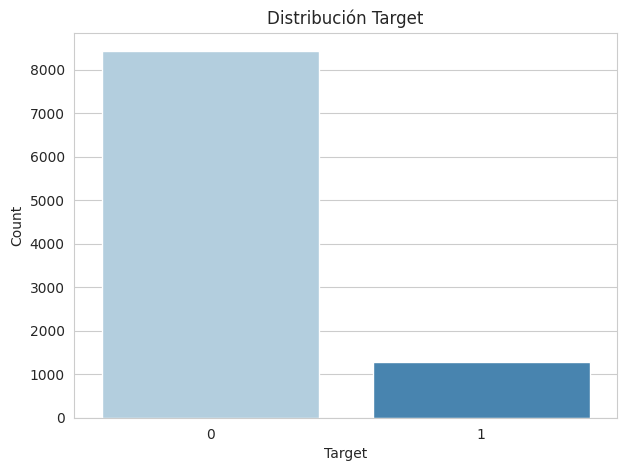

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
palette = 'crest'
sns.countplot(data=df, x='Target', hue='Target', palette='Blues', legend=False)
plt.title('Distribución Target', size=12)
plt.xlabel('Target')
plt.ylabel('Count', size=10)
plt.show()

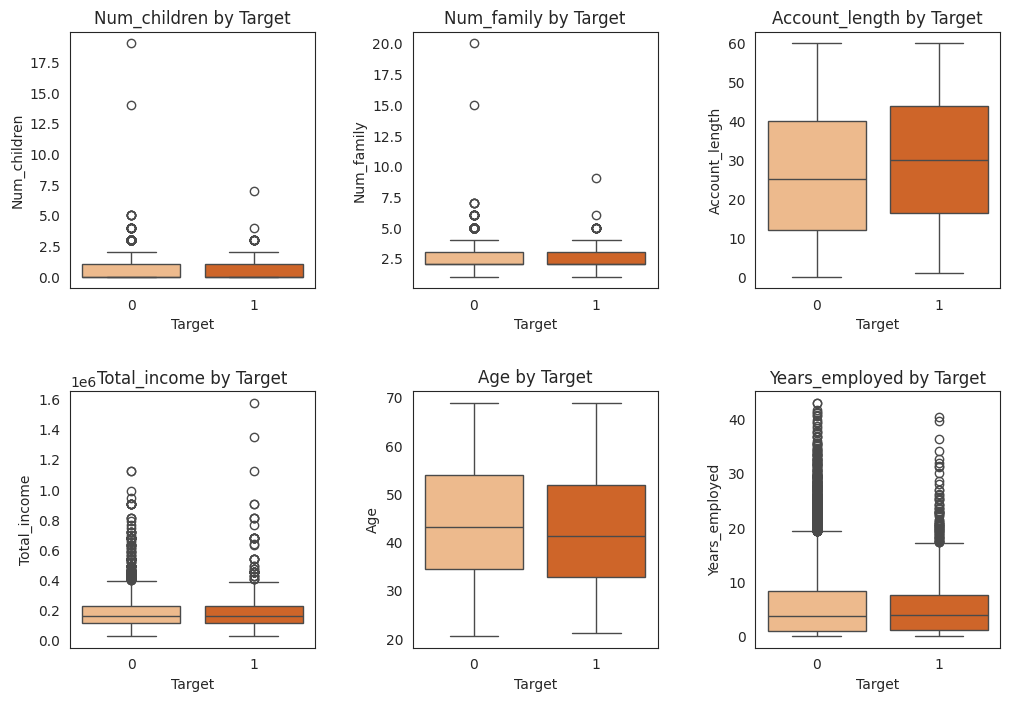

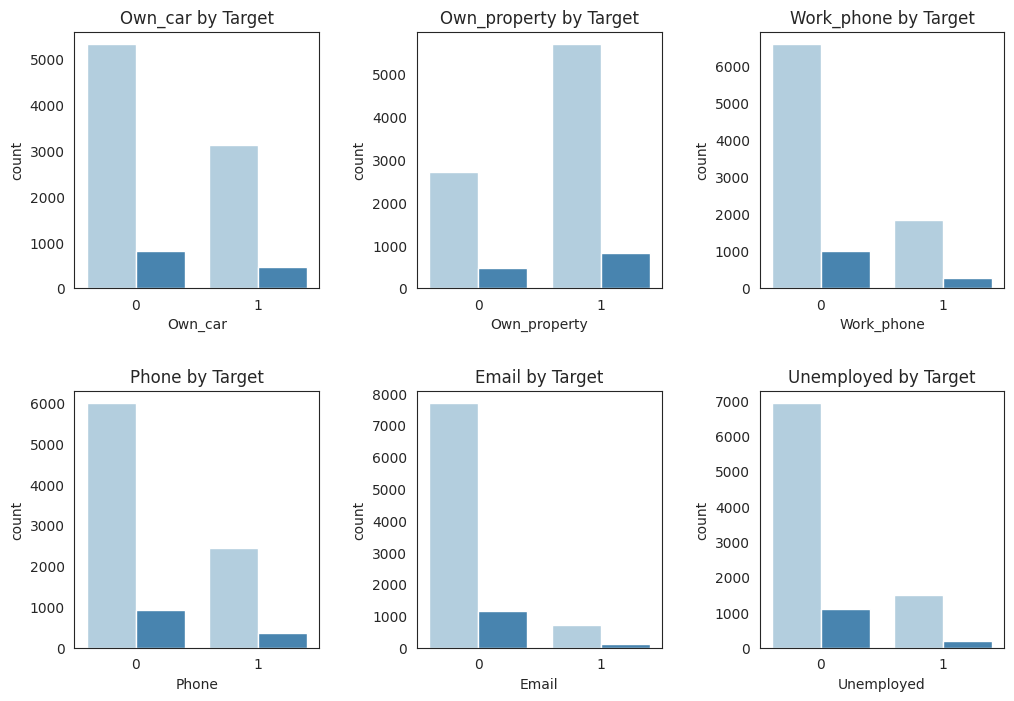

In [43]:
#Boxplot by Target
variables = [col for col in df.columns if col in ['Age', 'Total_income', 'Years_employed', 'Num_children', 'Num_family', 'Account_length']]
titles = [f'{col} by Target' for col in variables]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (var, title) in enumerate(zip(variables, titles)):
    sns.boxplot(data=df, x='Target', y=var, hue='Target', palette='Oranges', legend=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(title)

plt.subplots_adjust(hspace=0.4, wspace=0.4)

#Countplot by Target
variables = ['Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']
titles = [f"{var} by Target" for var in variables]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, (var, title) in enumerate(zip(variables, titles)):
    sns.countplot(data=df, x=var, hue='Target', palette='Blues', legend=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(title)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

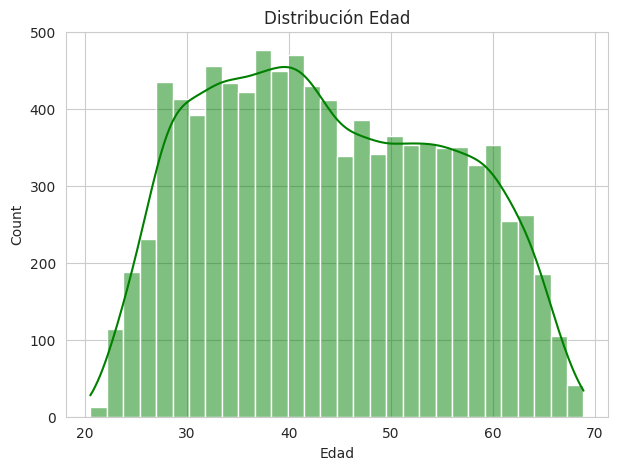

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='green')
plt.ylabel('Count', size=10)
plt.xlabel('Edad')
plt.title('Distribución Edad')
plt.show()

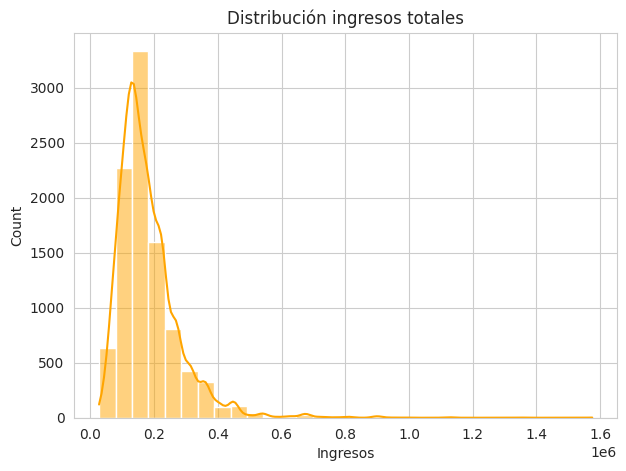

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
sns.histplot(df['Total_income'], kde=True, bins=30, color='orange')
plt.ylabel('Count', size=10)
plt.xlabel('Ingresos')
plt.title('Distribución ingresos totales')
plt.show()

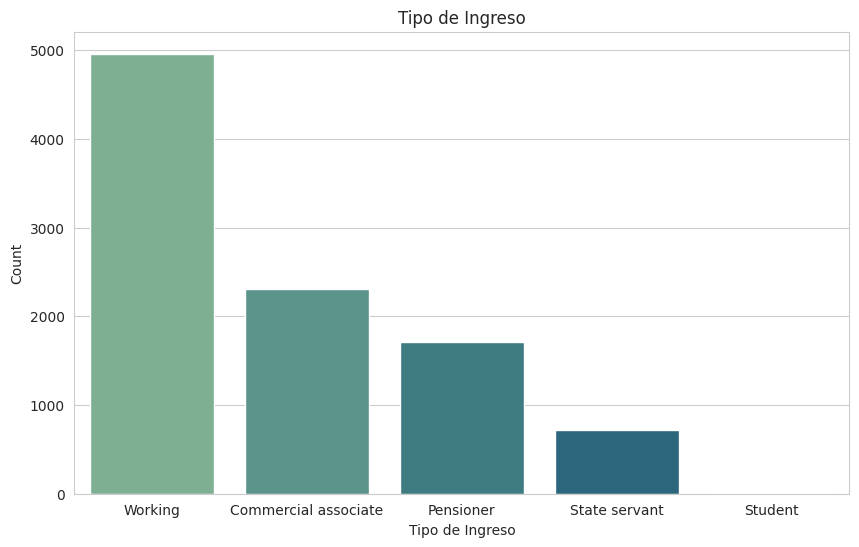

In [39]:
incometype = df['Income_type'].value_counts()
incometype_df = pd.DataFrame(incometype).reset_index()
incometype_df.columns = ['Income_type', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(data=incometype_df, x='Income_type', y='Count', hue='Income_type', palette='crest', legend=False)
plt.xlabel('Tipo de Ingreso')
plt.ylabel('Count')
plt.title('Tipo de Ingreso')
plt.show()

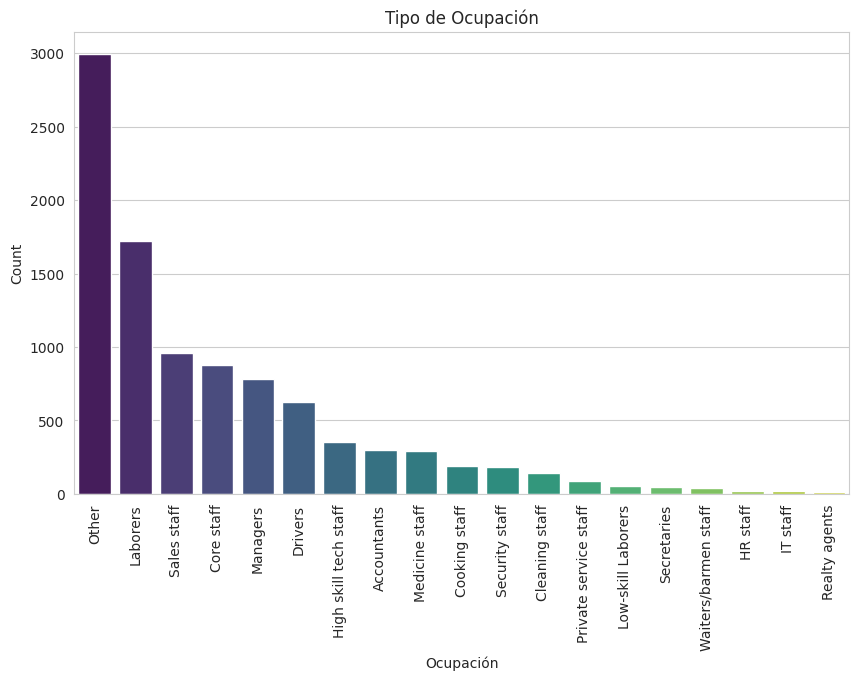

In [18]:
occupation = df['Occupation_type'].value_counts()
occupation_df = pd.DataFrame(occupation).reset_index()
occupation_df.columns = ['Occupation_type', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(data=occupation_df, x='Occupation_type', y='Count', hue='Occupation_type', palette='viridis', legend=False)
plt.xlabel('Ocupación')
plt.ylabel('Count')
plt.title('Tipo de Ocupación')
plt.xticks(rotation=90)
plt.show()

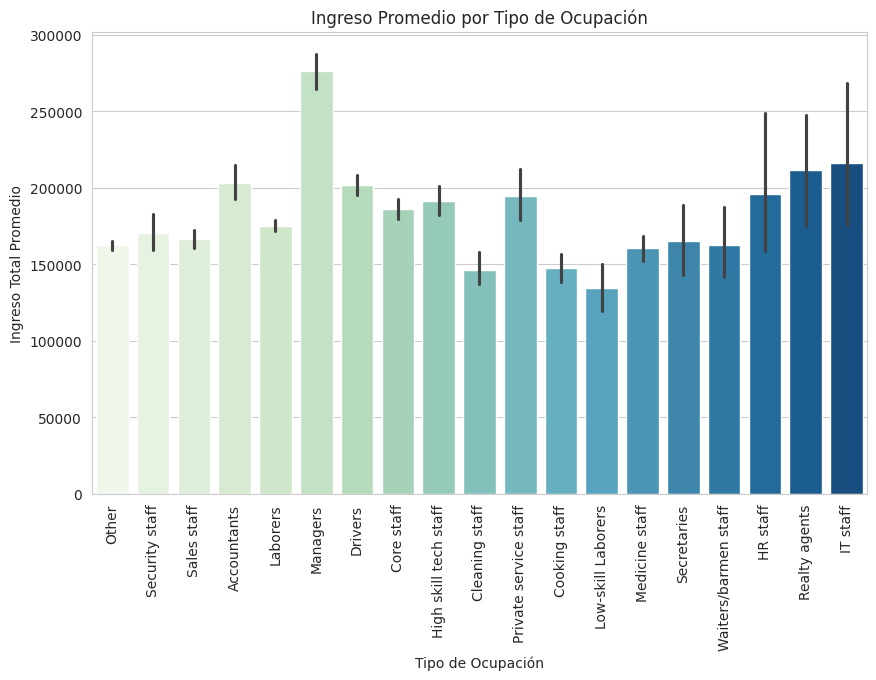

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation_type', y='Total_income', data=df, hue='Occupation_type', estimator=np.mean, palette='GnBu')
plt.title('Ingreso Promedio por Tipo de Ocupación')
plt.xlabel('Tipo de Ocupación')
plt.ylabel('Ingreso Total Promedio')
plt.xticks(rotation=90)
plt.show()

**Modelos predictivos**

In [20]:
y = df['Target']
X = df.drop(columns = 'Target')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore' , sparse=False)

In [22]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [23]:
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [24]:
col_transformer = make_column_transformer(cat_tuple, num_tuple, remainder = 'passthrough')

In [25]:
col_transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cbb89620550>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7cbb89620ee0>)])

In [26]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [27]:
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)

All data in X_train_processed are float64
All data in X_test_processed are float64


Decision Tree

In [28]:
dec_tree = DecisionTreeClassifier(random_state=42 , max_depth=2)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [29]:
dec_tree_train_score = dec_tree.score(X_train_processed, y_train).round(2)
print('Train:', dec_tree_train_score)
dec_tree_test_score = dec_tree.score(X_test_processed, y_test).round(2)
print('Test:', dec_tree_test_score)

Train: 0.87
Test: 0.85


Random Forest

In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [31]:
rf_train_score = rf.score(X_train_processed, y_train).round(2)
print('Train:', rf_train_score)
rf_test_score = rf.score(X_test_processed, y_test).round(2)
print('Test:', rf_test_score)

Train: 1.0
Test: 0.86


Gradient Boosting

In [32]:
gb = GradientBoostingClassifier()
gb.fit(X_train_processed, y_train)

GradientBoostingClassifier()

In [33]:
gb_train_score = gb.score(X_train_processed, y_train).round(2)
print('Train:', gb_train_score)
gb_test_score = gb.score(X_test_processed, y_test).round(2)
print('Test:', gb_test_score)

Train: 0.88
Test: 0.86


Métricas Modelos

In [34]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()}

results = []
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall])

metricas = pd.DataFrame(results, columns=[' ', 'Accuracy', 'Precision', 'Recall']).round(2)
metricas = metricas.set_index(' ').T
print(metricas)

           Decision Tree  Random Forest  Gradient Boosting
Accuracy            0.76           0.86               0.86
Precision           0.16           0.43               0.33
Recall              0.16           0.01               0.00


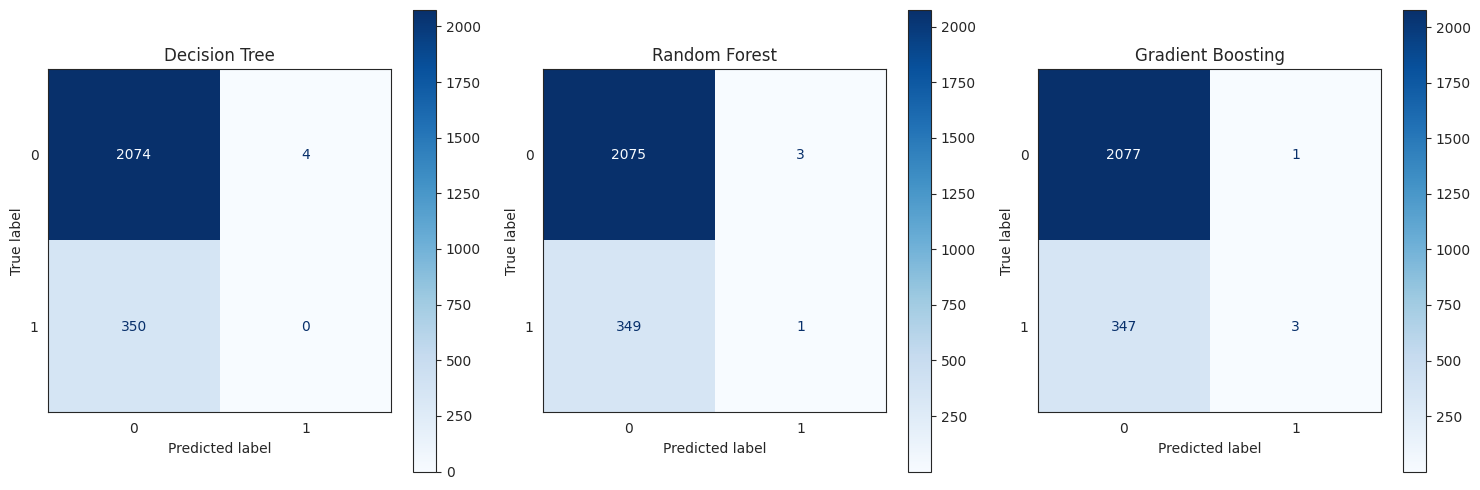

In [42]:
sns.set_style('white')
models = [dec_tree, rf, gb]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model, name) in enumerate(zip(models, model_names)):
    y_pred = model.predict(X_test_processed)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=axes[i])
    axes[i].set_title(name)

plt.tight_layout()
plt.show()

**Resultados Modelos**

**Decision Tree**

- La baja precisión y recall indican que el modelo no es eficiente en distinguir entre los clientes elegibles e inelegibles de manera confiable.

**Random Forest**

- Tiene la mejor precisión entre los modelos, lo que indica que cuando predice un cliente como elegible, es más probable que realmente lo sea. Presenta un recall extremadamente bajo, casi todos los clientes realmente elegibles son clasificados incorrectamente como inelegibles. La alta precisión es buena para evitar falsos positivos, pero el bajo recall es un problema si el objetivo es maximizar la inclusión de todos los clientes potencialmente buenos.

**Gradient Boosting**

- Presenta una precisión razonablemente buena, lo que significa que las pocas predicciones positivas que hace tienden a ser correctas, sin embargo, no logra identificar correctamente a ningún cliente elegible. La precisión es útil, pero el recall inexistente significa que el modelo falla en identificar a clientes que deberían recibir una tarjeta de crédito.


**Recomendación del Mejor Modelo**

En el contexto de otorgar tarjetas de crédito, donde tanto la inclusión de clientes elegibles como la prevención de otorgar crédito a clientes no elegibles son importantes, Random Forest se presenta como el mejor modelo. A pesar de su bajo recall, tiene la mayor precisión y accuracy, lo que indica que es menos probable que cometa errores al identificar a un cliente como elegible. Sin embargo, el bajo recall debe ser abordado para mejorar la capacidad del modelo de capturar más verdaderos positivos.

En resumen, aunque Random Forest tiene sus desventajas, es el mejor modelo para evitar errores y mantener una alta precisión. Sin embargo, sería útil buscar formas de mejorar su capacidad para identificar a más clientes elegibles sin disminuir su accuracy, haciendo el modelo más completo.






